In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from spread_train import *
import pickle
import time
import seaborn as sns

with open('dict_data_final.pkl', 'rb') as f:
    dict_data_final = pickle.load(f)

In [107]:
x, y = dict_data_final['Bolulla']
y = torch.from_numpy(y)

In [108]:
x.Train.values.sum(), y.shape[-1]

(9, 10)

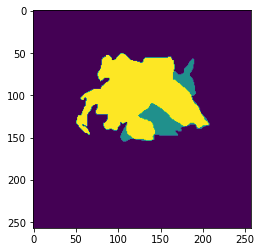

In [109]:
plt.imshow(y[:, :, -1])

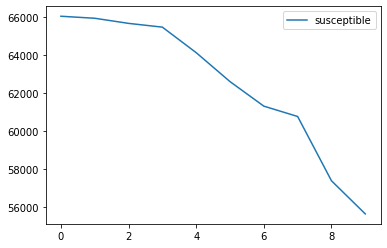

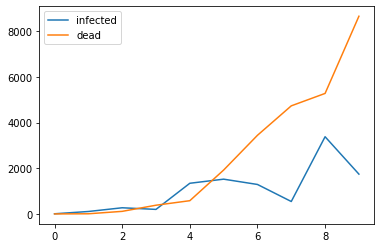

In [110]:
y0, y1, y2 = (y==0).type(torch.int), (y==1).type(torch.int), (y==2).type(torch.int)

# get sus_k such that sus_k = y0[:, :, k].sum()
# get inf_k such that inf_k = y1[:, :, k].sum()
# get dead_k such that dead_k = y2[:, :, k].sum()ç

sus_k = y0.sum(dim=(0, 1))
inf_k = y1.sum(dim=(0, 1))
dead_k = y2.sum(dim=(0, 1))

plt.plot(sus_k, label='susceptible')
plt.legend()
plt.show()

plt.plot(inf_k, label='infected')
plt.plot(dead_k, label='dead')
plt.legend()
plt.show()

# 1. Vamos a calcular algunas pruebas conn nuestro modelo

Vamos a usar los siguientes parámetros:

$$ \Delta_{ID} \in\{1,2,4,8\},\quad \mathcal{P}:=\{0.1, 0.5, 0.9\},\quad p_0 = 0.25,\quad C=2$$

In [111]:
x, y = dict_data_final['Artana']
y = torch.from_numpy(y)

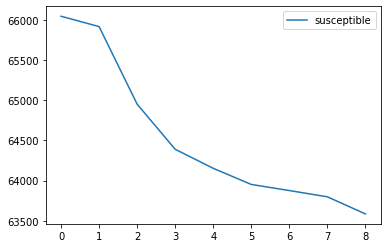

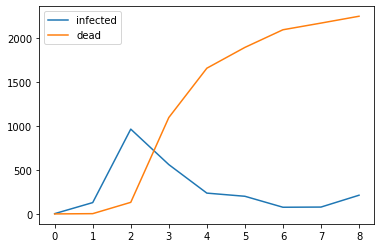

In [112]:
y0, y1, y2 = (y==0).type(torch.int), (y==1).type(torch.int), (y==2).type(torch.int)

# get sus_k such that sus_k = y0[:, :, k].sum()
# get inf_k such that inf_k = y1[:, :, k].sum()
# get dead_k such that dead_k = y2[:, :, k].sum()ç

sus_k = y0.sum(dim=(0, 1))
inf_k = y1.sum(dim=(0, 1))
dead_k = y2.sum(dim=(0, 1))

plt.plot(sus_k, label='susceptible')
plt.legend()
plt.show()

plt.plot(inf_k, label='infected')
plt.plot(dead_k, label='dead')
plt.legend()
plt.show()

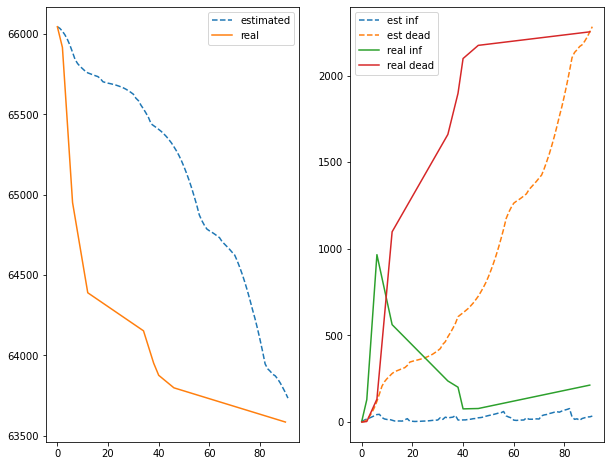

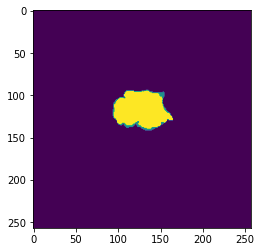

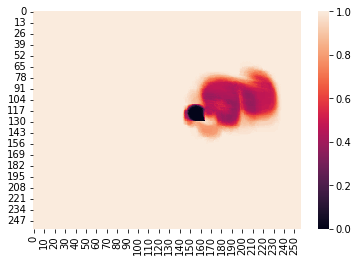

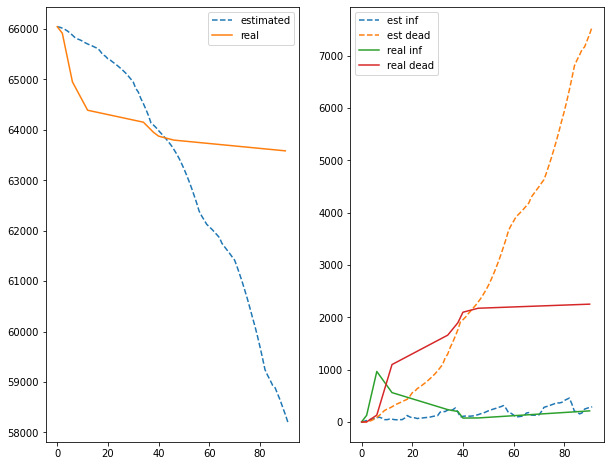

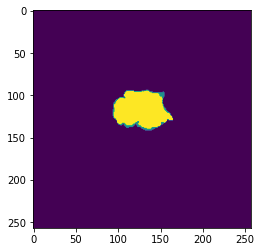

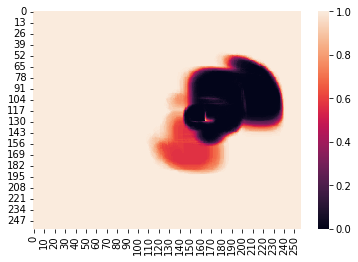

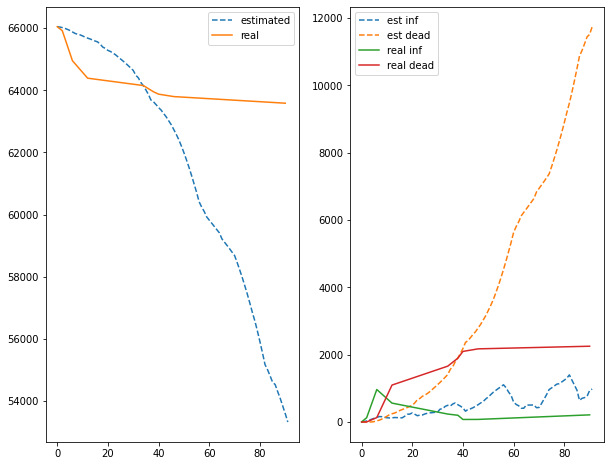

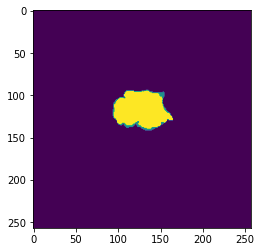

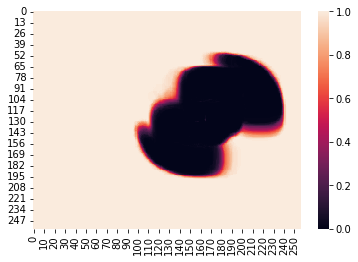

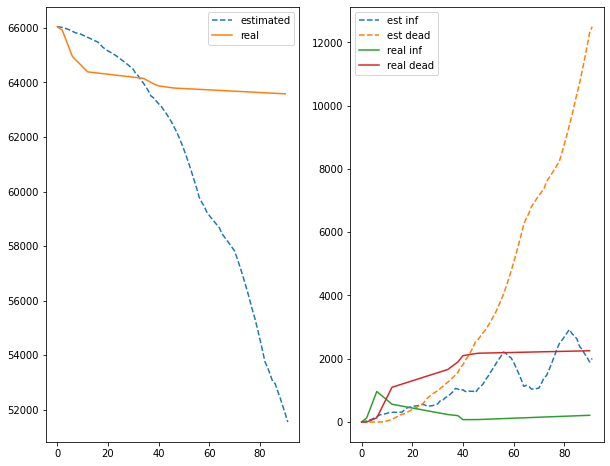

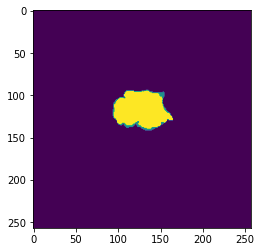

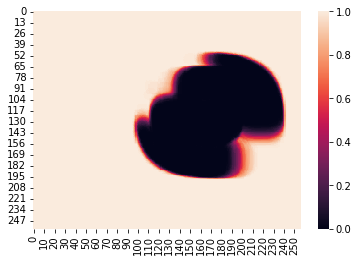

In [114]:
x, y = dict_data_final['Artana']

part = [0.1, 0.5, 0.9]
p0 = 0.25
div = 2
n_iter = 100

deltas = [1, 2, 4, 8]

for inc in deltas:
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    grid = Grid(x=x, y=y, mode='bernoulli')
    grid.initialize(p0=p0, div=div, inc=inc, part=part)
    grid.submatrix()
    grid.enlargement_process()
    grid.montecarlo(n_it=n_iter)

    abscisas = np.argwhere(x.Train.values == True).flatten()

    ax[0].plot(grid.df_MC.Susceptible.values, '--', label='estimated')
    ax[0].plot(abscisas, sus_k.numpy(), label='real')
    ax[0].legend()
    
    ax[1].plot(grid.df_MC.Infected.values, '--', label='est inf')
    ax[1].plot(grid.df_MC.Dead.values, '--', label='est dead')
    ax[1].plot(abscisas, inf_k, label='real inf')
    ax[1].plot(abscisas, dead_k, label='real dead')
    ax[1].legend()
    
    plt.show()

    plt.imshow(y[:, :, -1])
    plt.show()

    sns.heatmap(grid.X0[:, :, -1])
    plt.show()
    

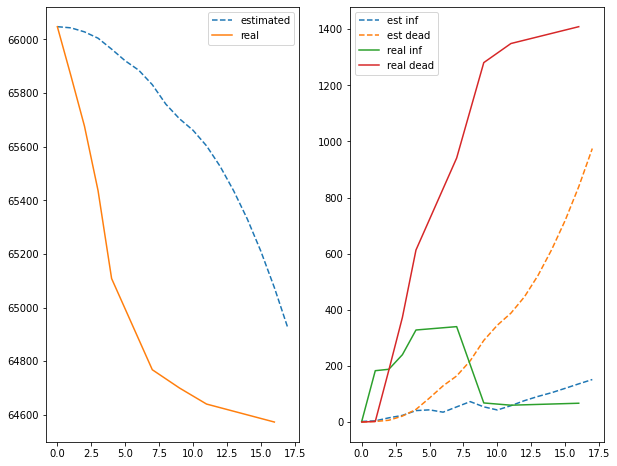

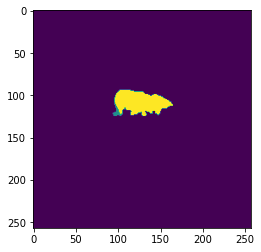

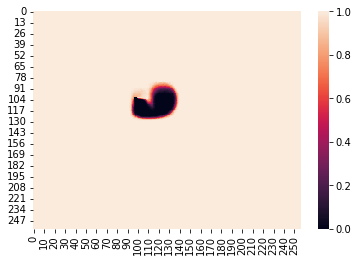

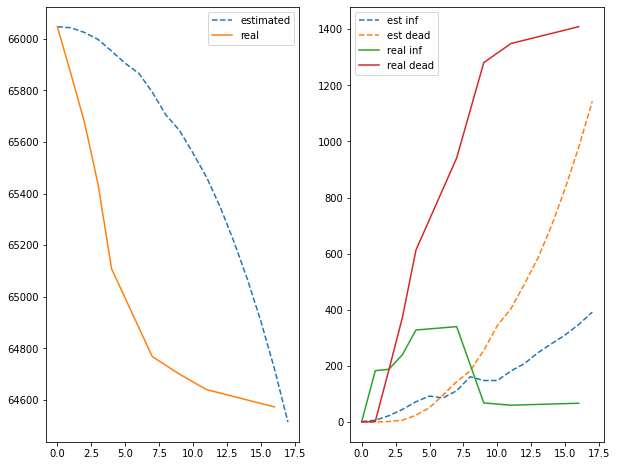

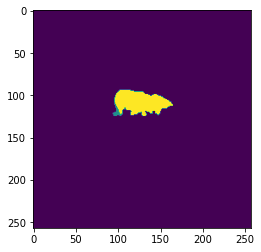

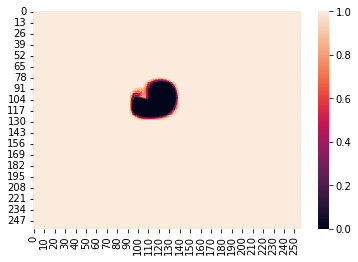

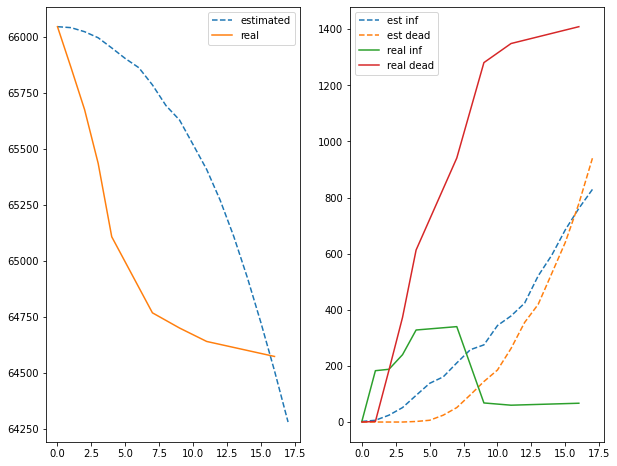

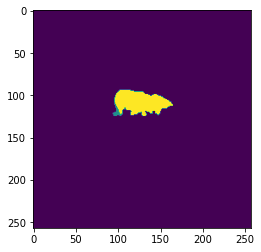

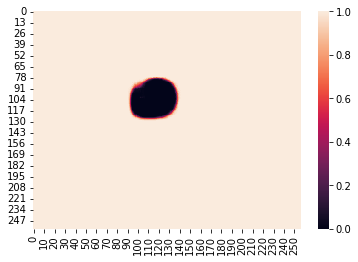

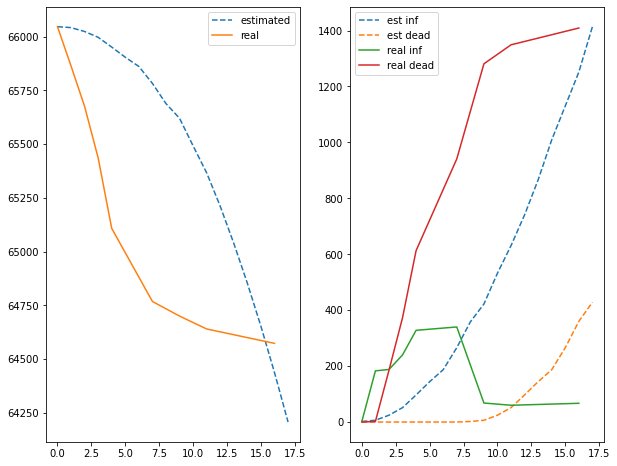

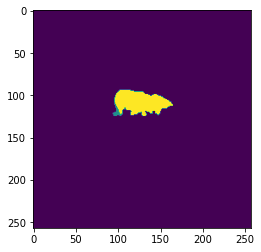

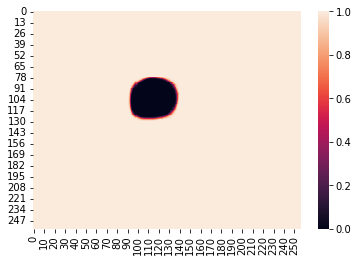

In [117]:
x, y = dict_data_final['Beneixama']
y = torch.from_numpy(y)

y0, y1, y2 = (y==0).type(torch.int), (y==1).type(torch.int), (y==2).type(torch.int)

# get sus_k such that sus_k = y0[:, :, k].sum()
# get inf_k such that inf_k = y1[:, :, k].sum()
# get dead_k such that dead_k = y2[:, :, k].sum()ç

sus_k = y0.sum(dim=(0, 1))
inf_k = y1.sum(dim=(0, 1))
dead_k = y2.sum(dim=(0, 1))

y = y.numpy()

part = [0.1, 0.5, 0.9]
p0 = 0.25
div = 2
n_iter = 100

deltas = [1, 2, 4, 8]

for inc in deltas:
    fig, ax = plt.subplots(1, 2, figsize=(10, 8))
    grid = Grid(x=x, y=y, mode='bernoulli')
    grid.initialize(p0=p0, div=div, inc=inc, part=part)
    grid.submatrix()
    grid.enlargement_process()
    grid.montecarlo(n_it=n_iter)

    abscisas = np.argwhere(x.Train.values == True).flatten()

    ax[0].plot(grid.df_MC.Susceptible.values, '--', label='estimated')
    ax[0].plot(abscisas, sus_k.numpy(), label='real')
    ax[0].legend()
    
    ax[1].plot(grid.df_MC.Infected.values, '--', label='est inf')
    ax[1].plot(grid.df_MC.Dead.values, '--', label='est dead')
    ax[1].plot(abscisas, inf_k, label='real inf')
    ax[1].plot(abscisas, dead_k, label='real dead')
    ax[1].legend()
    
    plt.show()

    plt.imshow(y[:, :, -1])
    plt.show()

    sns.heatmap(grid.X0[:, :, -1])
    plt.show()
    

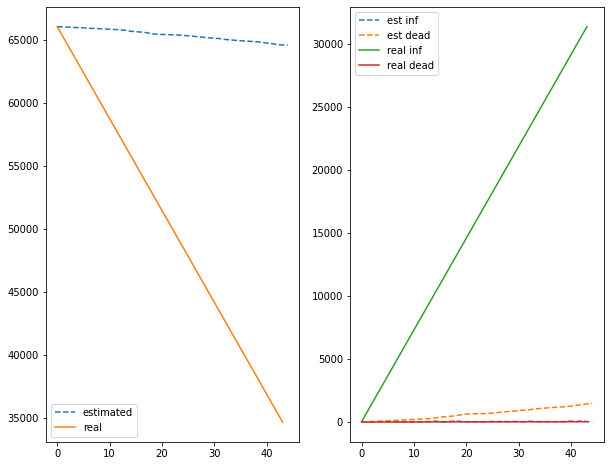

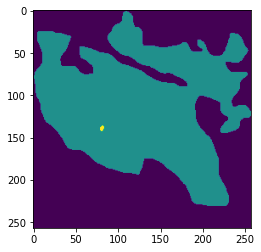

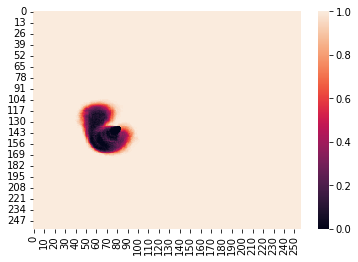

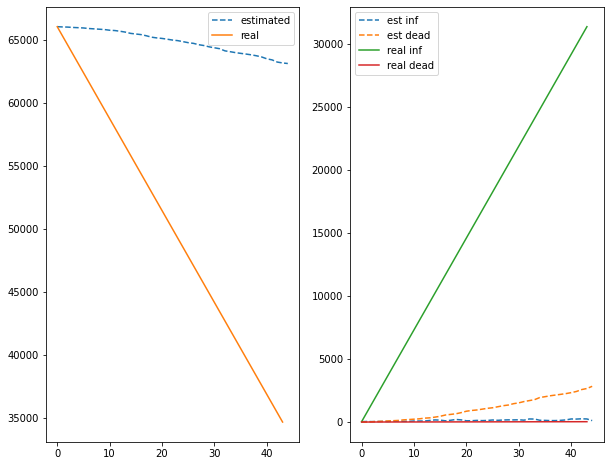

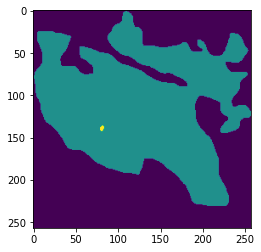

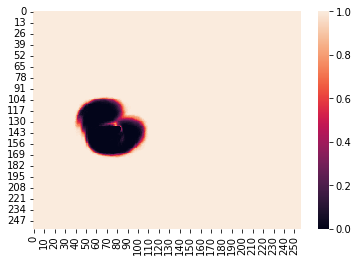

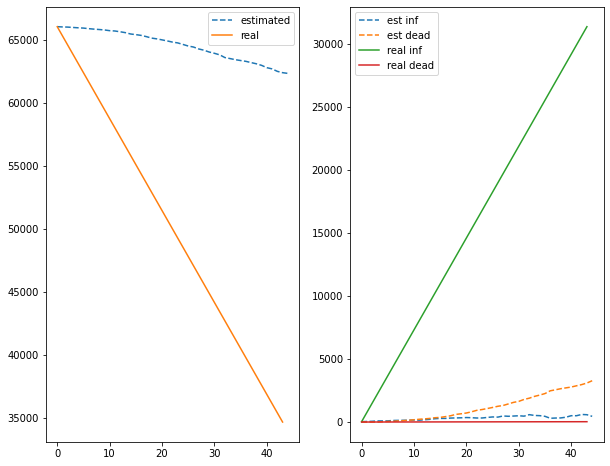

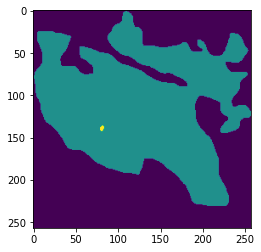

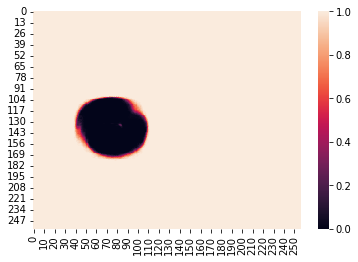

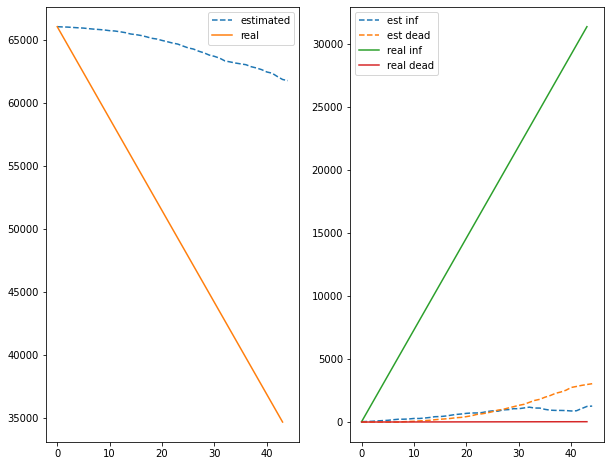

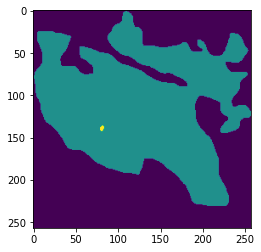

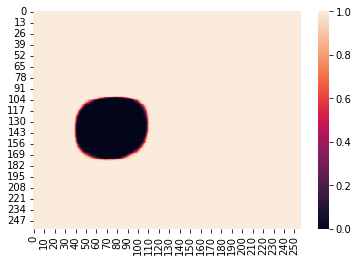

In [118]:
x, y = dict_data_final['Beniarda']

y = torch.from_numpy(y)

y0, y1, y2 = (y==0).type(torch.int), (y==1).type(torch.int), (y==2).type(torch.int)

# get sus_k such that sus_k = y0[:, :, k].sum()
# get inf_k such that inf_k = y1[:, :, k].sum()
# get dead_k such that dead_k = y2[:, :, k].sum()ç

sus_k = y0.sum(dim=(0, 1))
inf_k = y1.sum(dim=(0, 1))
dead_k = y2.sum(dim=(0, 1))

y = y.numpy()

part = [0.1, 0.5, 0.9]
p0 = 0.25
div = 2
n_iter = 100

deltas = [1, 2, 4, 8]

for inc in deltas:
    fig, ax = plt.subplots(1, 2, figsize=(10, 8))
    grid = Grid(x=x, y=y, mode='bernoulli')
    grid.initialize(p0=p0, div=div, inc=inc, part=part)
    grid.submatrix()
    grid.enlargement_process()
    grid.montecarlo(n_it=n_iter)

    abscisas = np.argwhere(x.Train.values == True).flatten()

    ax[0].plot(grid.df_MC.Susceptible.values, '--', label='estimated')
    ax[0].plot(abscisas, sus_k.numpy(), label='real')
    ax[0].legend()
    
    ax[1].plot(grid.df_MC.Infected.values, '--', label='est inf')
    ax[1].plot(grid.df_MC.Dead.values, '--', label='est dead')
    ax[1].plot(abscisas, inf_k, label='real inf')
    ax[1].plot(abscisas, dead_k, label='real dead')
    ax[1].legend()
    
    plt.show()

    plt.imshow(y[:, :, -1])
    plt.show()

    sns.heatmap(grid.X0[:, :, -1])
    plt.show()
    

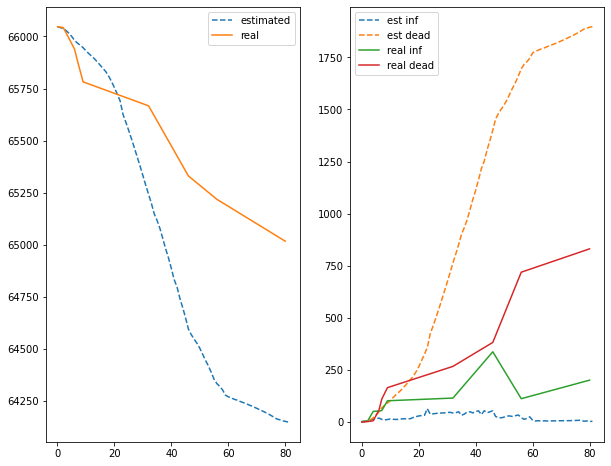

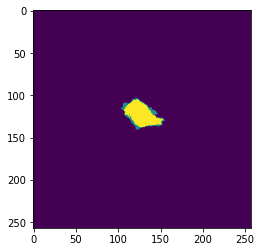

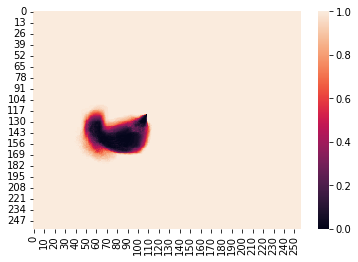

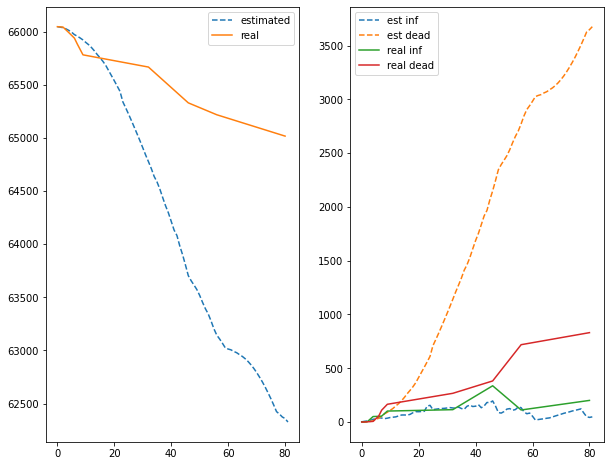

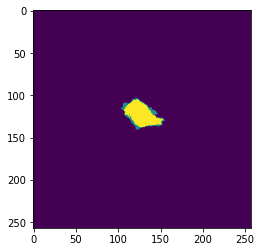

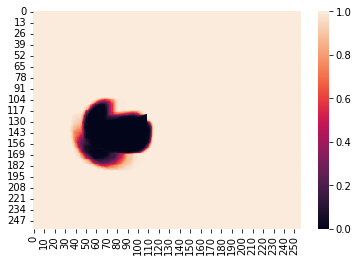

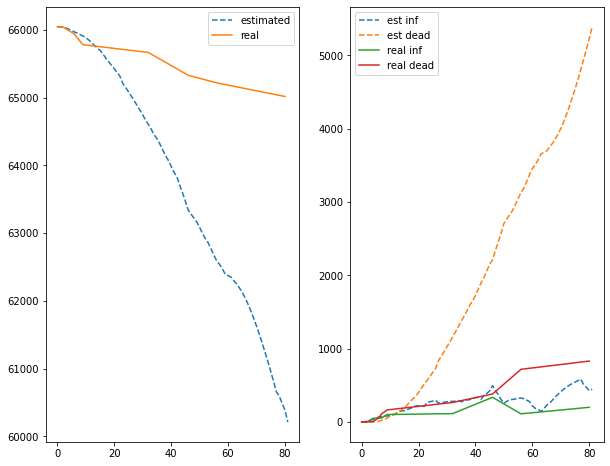

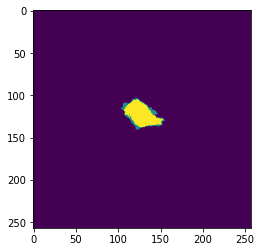

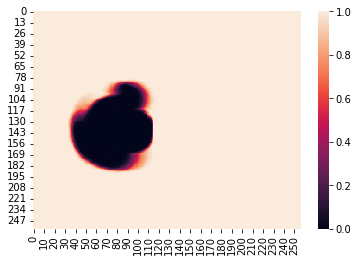

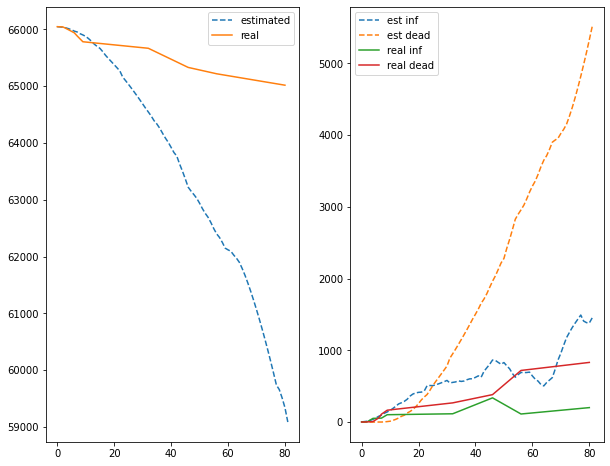

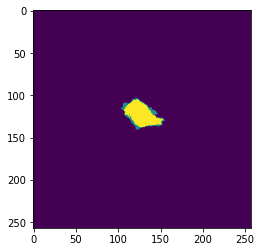

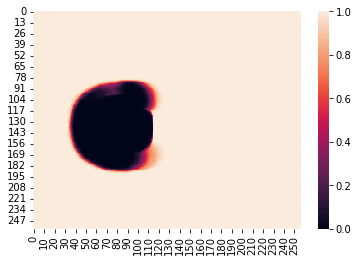

In [119]:
x, y = dict_data_final['Carcaixent']

y = torch.from_numpy(y)

y0, y1, y2 = (y==0).type(torch.int), (y==1).type(torch.int), (y==2).type(torch.int)

# get sus_k such that sus_k = y0[:, :, k].sum()
# get inf_k such that inf_k = y1[:, :, k].sum()
# get dead_k such that dead_k = y2[:, :, k].sum()ç

sus_k = y0.sum(dim=(0, 1))
inf_k = y1.sum(dim=(0, 1))
dead_k = y2.sum(dim=(0, 1))

y = y.numpy()

part = [0.1, 0.5, 0.9]
p0 = 0.25
div = 2
n_iter = 100

deltas = [1, 2, 4, 8]

for inc in deltas:
    fig, ax = plt.subplots(1, 2, figsize=(10, 8))
    grid = Grid(x=x, y=y, mode='bernoulli')
    grid.initialize(p0=p0, div=div, inc=inc, part=part)
    grid.submatrix()
    grid.enlargement_process()
    grid.montecarlo(n_it=n_iter)

    abscisas = np.argwhere(x.Train.values == True).flatten()

    ax[0].plot(grid.df_MC.Susceptible.values, '--', label='estimated')
    ax[0].plot(abscisas, sus_k.numpy(), label='real')
    ax[0].legend()
    
    ax[1].plot(grid.df_MC.Infected.values, '--', label='est inf')
    ax[1].plot(grid.df_MC.Dead.values, '--', label='est dead')
    ax[1].plot(abscisas, inf_k, label='real inf')
    ax[1].plot(abscisas, dead_k, label='real dead')
    ax[1].legend()
    
    plt.show()

    plt.imshow(y[:, :, -1])
    plt.show()

    sns.heatmap(grid.X0[:, :, -1])
    plt.show()
    